In [2]:
#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
 
from datetime import datetime
start_time = datetime.now()

In [3]:
df = pd.read_excel('F://UCSI_research//PG_Matters//Chan Kok Pin//post-viva//Dataset//Classification_data//Powder_Yaser//Powder2_snv.xlsx')   

X = df.iloc[: , 1:]
Y = df.iloc[:, 0]


# print(len(Y))
# print(len(X))
print(X.shape)
print(Y.shape)

(75, 228)
(75,)


Class 0: 15
Class 1: 15
Class 2: 15
Class 3: 15
Class 4: 15


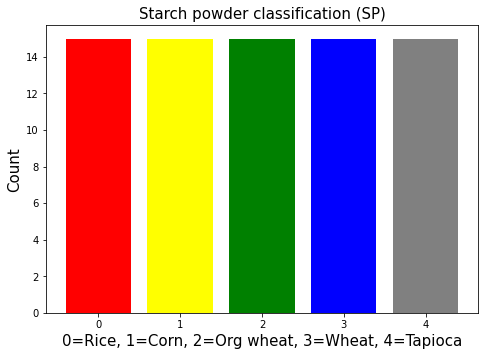

In [6]:
target_count=np.unique(Y, return_counts=True)
target_count = np.asarray(target_count)
print('Class 0:', target_count[1,0])
print('Class 1:', target_count[1,1])
print('Class 2:', target_count[1,2])
print('Class 3:', target_count[1,3])
print('Class 4:', target_count[1,4])

# print('Proportion:', round(target_count[1,0] / target_count[1,1], 2), ': 1')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
class1 = ['0', '1','2','3','4']
count = [target_count[1,0],target_count[1,1], target_count[1,2],target_count[1,3],target_count[1,4]]
ax.bar(class1,count,  color=['red', 'yellow','green','blue','grey'])
plt.title('Starch powder classification (SP)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('0=Rice, 1=Corn, 2=Org wheat, 3=Wheat, 4=Tapioca', fontsize=15)
plt.show()

In [3]:
 #add print spectrum...
# import seaborn as sns
# sns.set_theme()

# X1 = df.values[:, 1:].astype('float32')  
# y_toc = df.values[:,0]    
# wl = np.linspace(7398,10507, num=X1.shape[1], endpoint=True)   #wavelength range
# plt.plot(wl,X1.T)
# plt.title('Tablet Type (TT)', fontsize = 12)
# plt.xlabel(r'Wavelength(nm)', fontsize=12)
# plt.ylabel('Absorbance(au)', fontsize=12)
# plt.savefig('tablet type.png', dpi=300)
# plt.show() 

In [4]:
#train set,test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)  

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(56, 228)
(56,)
(19, 228)
(19,)


In [6]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
LGB=lgb.LGBMClassifier(verbose=0)

In [7]:
# #tuning   hyperparameters
paramsDT={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
paramsRF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


paramsLGB={'n_estimators':[100,200,300,400,500], 'learning_rate':[0.1, 0.25,0.5,0.75, 1],'reg_alpha':[0,0.01,0.05,0.1]}


# TUNING DT

In [8]:
DT1 = RandomizedSearchCV(estimator = DT, param_distributions = paramsDT, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

DT1.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],

In [9]:
best_DT = DT1.best_estimator_
print(best_DT)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=4,
                       min_weight_fraction_leaf=0.2, splitter='random')


In [10]:
# train the model with its best paramaters
best_DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=4,
                       min_weight_fraction_leaf=0.2, splitter='random')

In [11]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

dt_p1 = best_DT.predict(X_train)  
dt_p2 = best_DT.predict(X_test)
print(color.BOLD + 'DT RESULT' +color.END)
print('Train Acc:',"%.2f" % (accuracy_score(Y_train, dt_p1)*100),'%')
print('Train F1:',"%.2f" % f1_score(Y_train, dt_p1,  average='weighted'))
print('Test Acc:', "%.2f" % (accuracy_score(Y_test, dt_p2) * 100),'%')
print('Test F1:',"%.2f" % f1_score(Y_test, dt_p2, average='weighted'))

DT RESULT
Train Acc: 76.79 %
Train F1: 0.71
Test Acc: 42.11 %
Test F1: 0.37


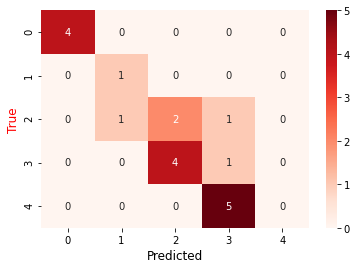

In [12]:
# plot prediction
cm1=confusion_matrix(y_true=Y_test, y_pred=dt_p2 )
sns.heatmap(cm1, annot=True, cmap='Reds', fmt='g')
# plt.title('Tablet Type (TT) \n 0=type-A; 1=type-B; 2=type-C; 3=type-D;', color= 'black', fontsize=12)
plt.xlabel('Predicted', color= 'black', fontsize=12)
plt.ylabel('True', color= 'red', fontsize=12)
plt.savefig('SP matrices confuse.png', dpi=300, bbox_inches='tight', transparent=False)

# TUNING LGBM

In [13]:
LGB1 = RandomizedSearchCV(estimator = LGB, param_distributions = paramsLGB, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

LGB1.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.25, 0.5, 0.75,
                                                          1],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.05, 0.1]},
                   random_state=0, verbose=3)

In [14]:
best_LGB = LGB1.best_estimator_
print(best_LGB)


LGBMClassifier(learning_rate=0.25, n_estimators=200, reg_alpha=0.05, verbose=0)


In [15]:
# train the model with its best paramaters
best_LGB.fit(X_train, Y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(learning_rate=0.25, n_estimators=200, reg_alpha=0.05, verbose=0)

In [16]:
lgb_p1 = best_LGB.predict(X_train)
lgb_p2 = best_LGB.predict(X_test)
print('LGBM result')
print('Train Acc:',"%.2f" % (accuracy_score(Y_train, lgb_p1)*100),'%')
print('Train F1:',"%.2f" % f1_score(Y_train, lgb_p1,  average='weighted'))
print('Test Acc:', "%.2f" % (accuracy_score(Y_test, lgb_p2) * 100),'%')
print('Test F1:',"%.2f" % f1_score(Y_test, lgb_p2, average='weighted')) 

LGBM result
Train Acc: 100.00 %
Train F1: 1.00
Test Acc: 100.00 %
Test F1: 1.00


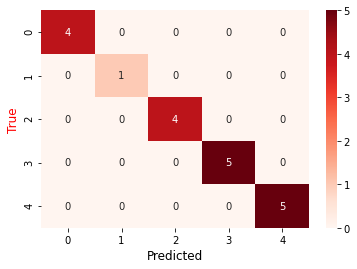

In [17]:
# plot prediction
cm2=confusion_matrix(y_true=Y_test, y_pred=lgb_p2 )
sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g')
# plt.title('Tablet Type (TT) \n 0=type-A; 1=type-B; 2=type-C; 3=type-D;', color= 'black', fontsize=12)
plt.xlabel('Predicted', color= 'black', fontsize=12)
plt.ylabel('True', color= 'red', fontsize=12)
plt.savefig('TT matrices confuse.png', dpi=300, bbox_inches='tight', transparent=False)

# TUNING RF

In [18]:
RF1 = RandomizedSearchCV(estimator = RF, param_distributions = paramsRF, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

RF1.fit(X_train, Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=0, verbose=3)

In [19]:
best_RF = RF1.best_estimator_
print(best_RF)

RandomForestClassifier(bootstrap=False, max_depth=85, max_features='sqrt',
                       min_samples_split=5, n_estimators=800)


In [20]:
# train the model with its best paramaters
best_RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=85, max_features='sqrt',
                       min_samples_split=5, n_estimators=800)

In [21]:
rf_p1 = best_RF.predict(X_train)
rf_p2 = best_RF.predict(X_test)
print('RF result')
print('Train Acc:',"%.2f" % (accuracy_score(Y_train, rf_p1)*100),'%')
print('Train F1:',"%.2f" % f1_score(Y_train, rf_p1,  average='weighted'))
print('Test Acc:', "%.2f" % (accuracy_score(Y_test, rf_p2) * 100),'%')
print('Test F1:',"%.2f" % f1_score(Y_test, rf_p2, average='weighted'))  

RF result
Train Acc: 100.00 %
Train F1: 1.00
Test Acc: 100.00 %
Test F1: 1.00


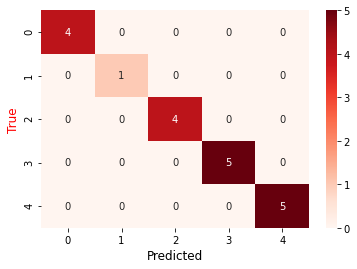

In [22]:
cm3=confusion_matrix(y_true=Y_test, y_pred=rf_p2 )
sns.heatmap(cm3, annot=True, cmap='Reds', fmt='g')
# plt.title('Tablet Type (TT) \n 0=type-A; 1=type-B; 2=type-C; 3=type-D;', color= 'black', fontsize=12)
plt.xlabel('Predicted', color= 'black', fontsize=12)
plt.ylabel('True', color= 'red', fontsize=12)
plt.savefig('TT matrices confuse.png', dpi=300, bbox_inches='tight', transparent=False)

In [23]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:55.141329
